# Tutorial_07:  linear regression

In [2]:
%matplotlib inline

> 已知 $\{(\mathbf{x}_i,\mathbf{y}_i)\}$ (注意$\mathbf{x}_i$ 和 $\mathbf{y}_i$ 可以是多维向量, multi-variable regression), 现在给定一个新的 $\mathbf{x}$ 求其对应的$\mathbf{y}$ 值

线性模型中学习目标的定义： $$\min_\mathbf{w} S,\quad S\equiv\sum\limits_i[y_i - f(\mathbf{x_i\cdot w})]^2$$

$$\quad x_0\equiv 1, \text{$\mathbf{w}$ 是列向量，表征线性回归的参数，其中 $w_0$ 表示bias}$$

$$\text{sklearn 中 $\mathbf{x_i\cdot w}\rightarrow$ x_test[0] * coef_[0] + ... + x_test[n_features-1] * coef_[n_features-1] + intercept_}$$

- 一般在数据少，feature space维度高时，可采用线性模型

- 常引入 Ridge 或 LASSO 正规化项 

模型测评的标准：$r^2$-score

$$ r^2\equiv 1- {\sum (y_i - f(\mathbf{x_i\cdot w}))^2\over \sum (y_i - \bar{y})^2}\le 1  $$

(事实上 $\min S$ 和 $\max r^2$ 是完全等价的)

## 线性回归（linear regression）

在linear regression中 $f(z) = z$



可以证明线性回归的学习目标，对应的解是：

$$ \mathbf{w} = (X^TX)^{-1}X^TY,\quad \text{$X$ 是已知feature数据$\mathbf{x_i}$对应的数据矩阵, $Y$ 是已知目标数据 $\mathbf{y_i}$对应的数据矩阵}$$


## 多项式回归（polynomial regression）

和线性回归的差别仅在于，输入 $(\mathbf{x})\rightarrow (\mathbf{x},\mathbf{x}^2,\cdots)$ “维度上升”

## 逻辑回归（logistic regression）

在logistic regression中 $$f(z) = \sigma(z)\equiv{1\over 1+ e^{-z}},\qquad y\in \{0, 1\}\quad\text{$z=0$ 对应decision boundary}$$

**example 1:**

train score: 0.910002


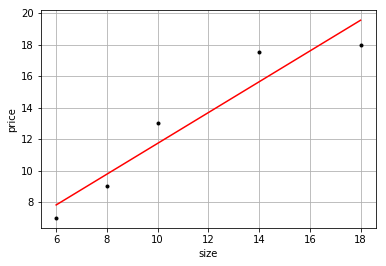

In [2]:
# %load scripts/LinearRegression_step02.py
import matplotlib.pyplot as plt
import numpy as np

data = np.array([[6, 7], [8, 9], [10, 13], [14, 17.5], [18, 18]])

X = data[:, :1]
y = data[:, 1:]


from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

yp = model.predict(X)


score = model.score(X, y) # r-squared score

print("train score: %.6f" % score)

plt.plot(X, y, 'k.')
plt.plot(X, yp, 'r-')
plt.xlabel('size')
plt.ylabel('price')
plt.grid(True)
plt.show()

**example 2:**

train score: 0.984400


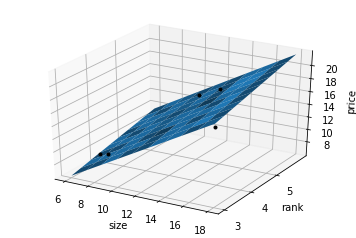

In [4]:
# %load scripts/LinearRegression_step03.py
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# data = np.array([[6, 7], [8, 9], [10, 13], [14, 17.5], [18, 18]])
data = np.array([[6, 4, 7], [8, 3.5, 9], [10, 6, 13], [14, 5, 17.5], [18, 3.0, 18]])

X = data[:, :2]
y = data[:, 2:]


from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

yp = model.predict(X)


score = model.score(X, y) # r-squared score

print("train score: %.6f" % score)


x0 = np.linspace(6, 18, 10)
x1 = np.linspace(3, 6, 10)
xx0, xx1 = np.meshgrid(x0, x1)
xx = zip(xx0.flatten(), xx1.flatten())

yp = model.predict(xx)
zz = yp.reshape((10, -1))


ax = plt.gca(projection='3d')
ax.plot(X[:,0], X[:,1], y[:,0], 'k.')
ax.plot_surface(xx0, xx1, zz)

ax.set_yticks([3, 4, 5])
ax.set_xlabel('size')
ax.set_ylabel('rank')
ax.set_zlabel('price')
plt.grid(True)
plt.show()

**example 3:**

In [6]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y, true_coefficient = make_regression(n_samples=200, n_features=30, n_informative=10, noise=100, coef=True, random_state=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, train_size=60)
print(X_train.shape)
print(y_train.shape)

(60L, 30L)
(60L,)


In [7]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression().fit(X_train, y_train)
print("R^2 on training set: %f" % linear_regression.score(X_train, y_train))
print("R^2 on test set: %f" % linear_regression.score(X_test, y_test))

R^2 on training set: 0.878011
R^2 on test set: 0.216332


In [8]:
from sklearn.metrics import r2_score
print(r2_score(np.dot(X, true_coefficient), y))

0.598528449588


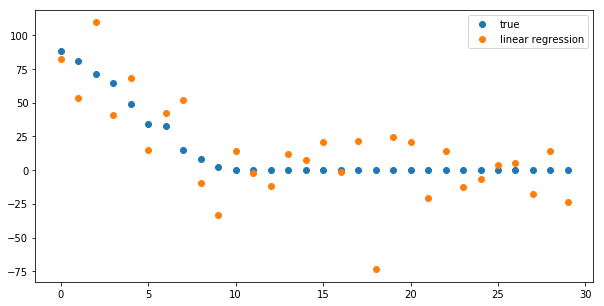

In [9]:

plt.figure(figsize=(10, 5))
coefficient_sorting = np.argsort(true_coefficient)[::-1]
plt.plot(true_coefficient[coefficient_sorting], "o", label="true")
plt.plot(linear_regression.coef_[coefficient_sorting], "o", label="linear regression")

plt.legend()
plt.show()

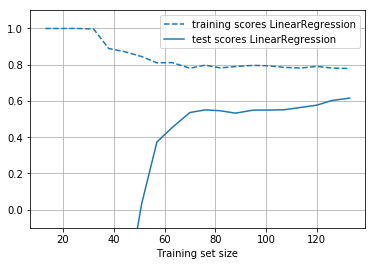

In [10]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(est, X, y):
    training_set_size, train_scores, test_scores = learning_curve(est, X, y, train_sizes=np.linspace(.1, 1, 20))
    estimator_name = est.__class__.__name__
    line = plt.plot(training_set_size, train_scores.mean(axis=1), '--', label="training scores " + estimator_name)
    plt.plot(training_set_size, test_scores.mean(axis=1), '-', label="test scores " + estimator_name, c=line[0].get_color())
    plt.xlabel('Training set size')
    plt.legend(loc='best')
    plt.grid(True)
    plt.ylim(-0.1, 1.1)

plt.figure()    
plot_learning_curve(LinearRegression(), X, y)
plt.show()

## Ridge Regression (Linear Regression with L2 regularization)

- L2 正则化
- 没有额外的计算成本（仍然是二次型）
- 超参数 $\alpha$
$$\min_\mathbf{w} S,\quad S\equiv\sum\limits_i[y_i - f(\mathbf{x_i\cdot w})]^2 + \alpha ||w||^2$$



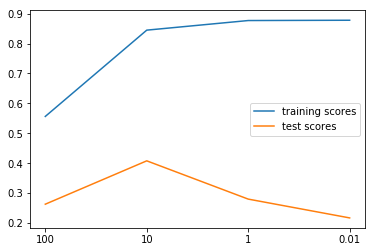

In [19]:
from sklearn.linear_model import Ridge
ridge_models = {}
training_scores = []
test_scores = []

for alpha in [100, 10, 1, .01]:
    ridge = Ridge(alpha=alpha).fit(X_train, y_train)
    training_scores.append(ridge.score(X_train, y_train))
    test_scores.append(ridge.score(X_test, y_test))
    ridge_models[alpha] = ridge

plt.figure()
plt.plot(training_scores, label="training scores")
plt.plot(test_scores, label="test scores")
plt.xticks(range(4), [100, 10, 1, .01])
plt.legend(loc="best")
plt.show()

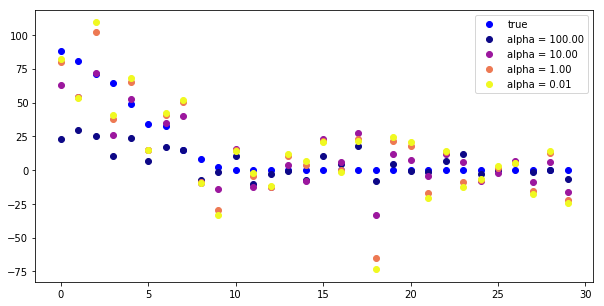

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(true_coefficient[coefficient_sorting], "o", label="true", c='b')

for i, alpha in enumerate([100,10, 1, .01]):
    plt.plot(ridge_models[alpha].coef_[coefficient_sorting], "o", label="alpha = %.2f" % alpha, c=plt.cm.plasma(i / 3.))
    
plt.legend(loc="best")
plt.show()

超参数 $\alpha$ 对 performance 的影响至关重要.

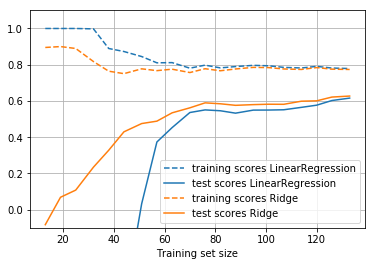

In [25]:
plt.figure()
plot_learning_curve(LinearRegression(), X, y)
plot_learning_curve(Ridge(alpha=10), X, y)
plt.show()

## Lasso Regression  (Linear Regression with L1 regularization)

- L1 正则化
- 可以迫使参数具有 sparsity
- 超参数 $\alpha$
$$\min_\mathbf{w} S,\quad S\equiv\sum\limits_i[y_i - f(\mathbf{x_i\cdot w})]^2 + \alpha ||w||$$


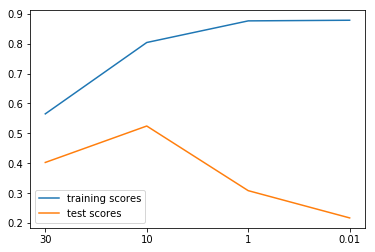

In [26]:
from sklearn.linear_model import Lasso

lasso_models = {}
training_scores = []
test_scores = []

for alpha in [30, 10, 1, .01]:
    lasso = Lasso(alpha=alpha).fit(X_train, y_train)
    training_scores.append(lasso.score(X_train, y_train))
    test_scores.append(lasso.score(X_test, y_test))
    lasso_models[alpha] = lasso
plt.figure()
plt.plot(training_scores, label="training scores")
plt.plot(test_scores, label="test scores")
plt.xticks(range(4), [30, 10, 1, .01])
plt.legend(loc="best")
plt.show()

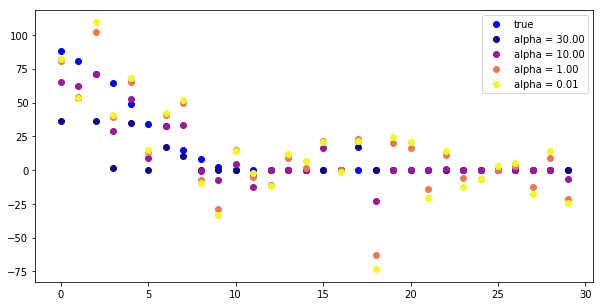

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(true_coefficient[coefficient_sorting], "o", label="true", c='b')

for i, alpha in enumerate([30, 10, 1, .01]):
    plt.plot(lasso_models[alpha].coef_[coefficient_sorting], "o", label="alpha = %.2f" % alpha, c=plt.cm.plasma(i / 3.))
    
plt.legend(loc="best")
plt.show()

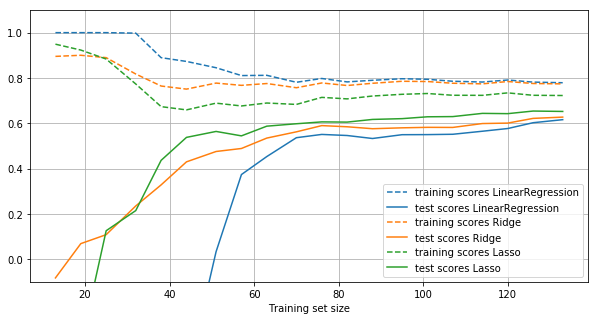

In [33]:
plt.figure(figsize=(10, 5))
plot_learning_curve(LinearRegression(), X, y)
plot_learning_curve(Ridge(alpha=10), X, y)
plot_learning_curve(Lasso(alpha=10), X, y)
plt.show()

**ElasticNet**

$$\min_\mathbf{w} S,\quad S\equiv\sum\limits_i[y_i - f(\mathbf{x_i\cdot w})]^2 + \alpha r ||w|| + 0.5\alpha(1-r)\|w\|^2$$
